In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-tolstihin/experiment_lesson_4.csv'

In [5]:
df = pd.read_csv(path_to_file_convertion , sep = ',')
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [6]:
df.query("experiment_group == 'test'")

,order_id,delivery_time,district,experiment_group
10092,12494,38.0,Purlieus,test
10093,12136,31.0,Purlieus,test
10094,11987,39.0,Purlieus,test
10095,12848,29.0,Central,test
10096,13166,31.0,Purlieus,test
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


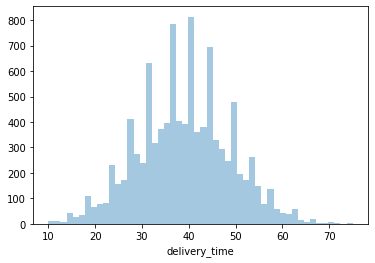

In [7]:
sns.distplot(df.query("experiment_group == 'test'").delivery_time, kde = False)

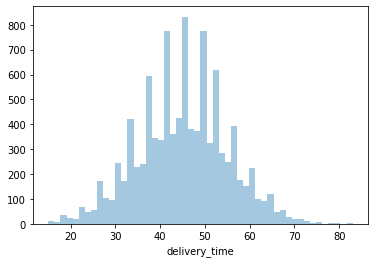

In [8]:
sns.distplot(df.query("experiment_group == 'control'").delivery_time, kde = False)

In [12]:
df.query("experiment_group == 'test'").order_id.count() - df.query("experiment_group == 'control'").order_id.count()

12

In [13]:
scipy.stats.normaltest(df.query("experiment_group == 'test'").delivery_time)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [14]:
scipy.stats.normaltest(df.query("experiment_group == 'control'").delivery_time)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [16]:
np.std(df.query("experiment_group == 'test'").delivery_time)

9.882819260031342

In [17]:
np.std(df.query("experiment_group == 'control'").delivery_time)

9.989522000652327

In [19]:
from scipy import stats

stats.ttest_ind(df.query("experiment_group == 'control'").delivery_time, df.query("experiment_group == 'test'").delivery_time)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

In [27]:
round(100*(df.query("experiment_group == 'test'").delivery_time.mean()/df.query("experiment_group == 'control'").delivery_time.mean() - 1), 2)

-13.35